Load the given dataset. Read the file using CSV reader and extract the column for Reads and write into a new text file

In [ ]:
import csv

Given_file = "Lab03_RNAseq_dataset.txt"
Reads_file = "ReadSequences.txt"
with open(Given_file) as read_data:
    with open(Reads_file, "w") as tmp_file:
        reader = csv.reader(read_data, delimiter = "\t")
        writer = csv.writer(tmp_file)
        desired_column = [1]     
        for row in reader:     
            Reads = list(row[i] for i in desired_column)  
            writer.writerow(Reads) 

Loding chromosome sequence

In [ ]:
!wget  ftp://ftp.ensemblgenomes.org/pub/plants/release-33/fasta/zea_mays/dna/Zea_mays.AGPv4.dna.chromosome.Pt.fa.gz

In [ ]:
!gzip -d Zea_mays.AGPv4.dna.chromosome.Pt.fa.gz

gzip: Zea_mays.AGPv4.dna.chromosome.Pt.fa.gz: No such file or directory


KMP algorithm 
Step 1: First define a function for KMP partial table
Step 2: Next define a function for KMP search and use the function for KMP partial table here to get the index number

In [ ]:
!pip install biopython

In [ ]:
from Bio import SeqIO
import pandas as pd
import time

def KMP_table(Pattern):
  n = len(Pattern)
  PMatch = [0] * n
  k = 0
  for i in range(1,n):
    if Pattern[i] == Pattern[k]:
      PMatch[i] = k+1
      k = k +1
    else:
      while k > 0:
        k = PMatch[k-1]
        if Pattern[k] == Pattern[i]:
          PMatch[i] = k+1
          k = k+1
          break
      if k == 0:
        if Pattern[i] == Pattern[k]:
          PMatch[i] = k+1
          k = k+1
        else:
          PMatch[i] = 0
    return PMatch

def KMP_Search(Pattern, sequence):
  a = len(Pattern)
  b = len(sequence)
  PMatch = KMP_table(Pattern)
  position = []
  p = 0
  q = 0
  while p < b:
      if sequence[p] == Pattern[q]:
          p = p+ 1
          q = q+ 1
          if q == a:
            pos = p-q
            q = PMatch[q-1]
            position.append(pos +1)
            #print("Pattern Found!!", sequence[pos:pos+a])
            return position
      else:
        if q == 0:
          p =p+ 1
        else:
          q = PMatch[q-1]
  return position

#TestCase_1

with open ("Zea_mays.AGPv4.dna.chromosome.Pt.fa",'r') as data:
  for seq_record  in SeqIO.parse(data,'fasta'):
    sequence = str(seq_record.seq)
#print(sequence)
df = pd.DataFrame({'Reads':[], 'Start_position':[]})
with open('ReadSequences.txt') as f:
  Read_data = f.readlines()[1:]
  Reads = []
  for i in Read_data:
    Reads.append(i.strip())
with open("KMP_runtime.txt","w") as KMP:
  for i in range(len(Reads)):
    start = time.time()
    Pattern = Reads[i]
    #print(Pattern)
    Test= KMP_Search(Pattern, sequence)
    stop = time.time()
    total_time = stop - start
    KMP.write(str(total_time)+ '\n') 
    df=df.append({'Reads':Pattern,'Start_position':Test},ignore_index=True)

print('df\n',df)
    
 

ExactMatch algorithm

In [ ]:
def Exact_Match(Pattern, sequence):
  n= len(sequence)
  m= len(Pattern)
  for i in range(n - m +1):
    j= 0
    while(j < m):
      if (sequence[i+j] != Pattern[j]):
        break
      j +=1
    if(j == m):
      print("Pattern found ", i)

#TestCase_2
with open ("Zea_mays.AGPv4.dna.chromosome.Pt.fa",'r') as data:
  for seq_record  in SeqIO.parse(data,'fasta'):
    sequence = str(seq_record.seq)
#print(sequence)
with open('ReadSequences.txt') as f:
  Read_data = f.readlines()[1:]
  Reads = []
  for i in Read_data:
    Reads.append(i.strip())
with open("EM_runtime.txt","w") as EM:
  for i in range(len(Reads)):
    start = time.time()
    Pattern = Reads[i]
    print(Pattern)
    Test_2= Exact_Match(Pattern, sequence)
    stop = time.time()
    total_time = stop - start
    EM.write(str(total_time)+ '\n')
    #print(Test_2)
    

Boyer-Moore algorithm : Bad character

In [ ]:
def Bad_Character_table(Pattern,sequence):
  bad_char_table = {}
  for p in range(len(sequence)):
    bad_char_table[sequence[p]] = -1
  for q in range(len(Pattern)-1):
    bad_char_table[Pattern[q]] = q
  return bad_char_table

def BM_Search_badcharacter(Pattern, sequence):
  m = len(Pattern)
  n = len(sequence)
  bad_char_table = Bad_Character_table(Pattern, sequence)
  i = m-1
  location = []
  while i < (n-m):
    j = m-1
    while j>=0 and sequence[i+j] == Pattern[j]:
      j = j-1
      #print(j)
    if j< 0:
      pos = i
      location.append(pos+ 1)
      print("Pattern Found",sequence[pos:pos+m])
      d = m+1
    else:
      d = max(1,j-bad_char_table[sequence[i+j]])
    i = i + d  
  return location

#TestCase_3
with open ("Zea_mays.AGPv4.dna.chromosome.Pt.fa",'r') as data:
  for seq_record  in SeqIO.parse(data,'fasta'):
    sequence = str(seq_record.seq)
#print(sequence)
with open('ReadSequences.txt') as f:
  Read_data = f.readlines()[1:]
  Reads = []
  for i in Read_data:
    Reads.append(i.strip())
with open("BM_runtime.txt","w") as BM:
  for i in range(len(Reads)):
    start = time.time()
    Pattern = Reads[i]
    print(Pattern)
    Test_3= BM_Search_badcharacter(Pattern, sequence)
    stop = time.time()
    total_time = stop - start
    BM.write(str(total_time)+ '\n')
    #print(Test_3) 

Data Visualization

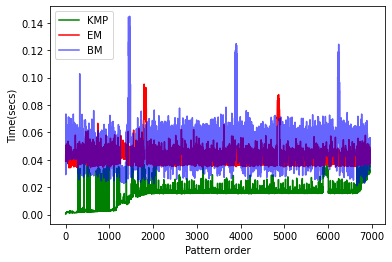

In [ ]:
import matplotlib.pyplot as plt
runs = []
KMP_time = []
EM_time = []
BM_bad_time = []

for i in range(1,6955):
  runs.append(i)
with open("KMP_runtime.txt") as KMP:
  for row in KMP:
    KMP_time.append(float(row))
    
with open("EM_runtime.txt") as EM:
  for row in EM:
    EM_time.append(float(row))

with open("BM_runtime.txt") as BM:
  for row in BM:
    BM_bad_time.append(float(row))


plt.plot(runs, KMP_time, label = "KMP", c = "g")
plt.plot(runs, EM_time, label = "EM", c = "r")
plt.plot(runs, BM_bad_time, label = "BM", c = "b", alpha = 0.6)
plt.xlabel("Pattern order")
plt.ylabel("Time(secs)")
plt.legend()
plt.show()




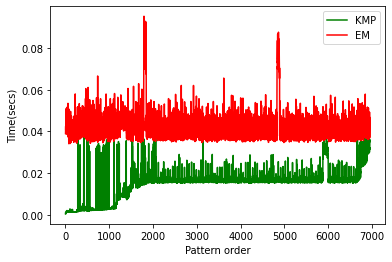

In [ ]:
plt.plot(runs, KMP_time, label = "KMP", c = "g")
plt.plot(runs, EM_time, label = "EM", c = "r")
plt.xlabel("Pattern order")
plt.ylabel("Time(secs)")
plt.legend()
plt.show()

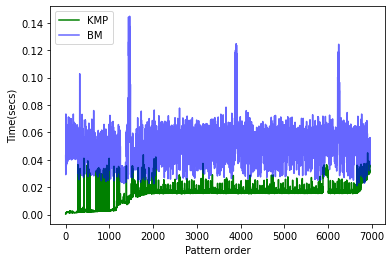

In [ ]:
plt.plot(runs, KMP_time, label = "KMP", c = "g")
plt.plot(runs, BM_bad_time, label = "BM", c = "b", alpha = 0.6)
plt.xlabel("Pattern order")
plt.ylabel("Time(secs)")
plt.legend()
plt.show()

In [ ]:
KMP_series = pd.Series(KMP_time)
KMP_series.describe()

count    6954.000000
mean        0.014693
std         0.006805
min         0.000462
25%         0.015453
50%         0.015929
75%         0.016518
max         0.045008
dtype: float64

In [ ]:
EM_series = pd.Series(EM_time)
EM_series.describe()

count    6954.000000
mean        0.041149
std         0.006329
min         0.034066
25%         0.037509
50%         0.039683
75%         0.042854
max         0.095205
dtype: float64

In [ ]:
BM_bad_series = pd.Series(BM_bad_time)
BM_bad_series.describe()

count    6954.000000
mean        0.050323
std         0.012196
min         0.021079
25%         0.044016
50%         0.051660
75%         0.055960
max         0.144733
dtype: float64